# Uke 1: Heisann, Vega-Altair! 

I denne notatboken vil vi fortsette å utforske hvordan du kan bruke visualisering til å utforske dataene dine ved å bruke to populære Python-biblioteker, [`pandas`](https://pandas.pydata.org/) og [`Vega-Altair`](https://altair-viz.github.io/). Ved slutten av denne modulen vil du kunne:
- Importer `altair` for å bruke i koden din
- Les inn en datafil ved hjelp av `pandas`
- Lag en diagramvisualisering ved å bruke "altair".
- Bruk merker og kodingskanaler på denne visualiseringen
- Arbeid med tidsdata
- Beskriv diagrammet ditt med en tittel og beskrivelse
- Lagre denne visualiseringen

## Pandas
Vi introduserte først [Pandas](https://pandas.pydata.org/) i notatboken [DIGI118 Modul 0: Hello, Pandas!](https://www.kaggle.com/code/lauragarrison/digi118-h24-modul-0-heisann-pandas). Pandas er et raskt, fleksibelt og uttrykksfullt bibliotek for å administrere og manipulere tabellformede datastrukturer. Det er bygget på programmeringsspråket Python, som vi introduserte i [DIGI118 Modul 0: Hello, Python!](https://www.kaggle.com/code/lauragarrison/digi118-h24-modul-0-heisann-python).

## Vega-Altair
[Altair](https://altair-viz.github.io/) er et deklarativt statistisk visualiseringsbibliotek for Python. Altair tilbyr en kraftig og konsis visualiseringsgrammatikk for raskt å bygge mange forskjellige typer statistisk grafikk. Den er basert på [Vega-Lite](https://vega.github.io/vega-lite/), en grammatikk på høyt nivå for interaktiv grafikk.

Med *deklarativ* mener vi at du kan gi en høynivåspesifikasjon av *hva* du vil at visualiseringen skal inkludere, i form av *data*, *grafiske merker* og *kodingskanaler*, i stedet for å måtte spesifisere *hvordan* implementere visualiseringen i form av for-løkker, tegnekommandoer osv.

Nøkkelideen er at du erklærer koblinger mellom datafelt og visuelle kodingskanaler, som x-aksen, y-aksen, farge osv. *Resten av plotdetaljene håndteres automatisk*. Ved å bygge på denne deklarative plottingsideen, kan en rekke enkle til sofistikerte visualiseringer lages ved hjelp av en kortfattet grammatikk.

Ved å bruke Altair har du et vennlig Python [API (Application Programming Interface)](https://en.wikipedia.org/wiki/Application_programming_interface) for å generere visuelle spesifikasjoner i interaktive miljøer som her i Kaggle eller i en vanlig Python-fil som gjengis i nettleseren.

**La oss komme i gang!**

---

### Lag først en kopi av denne notatboken ved å bruke knappen øverst til høyre i dette vinduet.
Nå er du klar til å kode i din egen versjon av denne notatboken.

# 1. Importer
For å begynne, må vi importere de nødvendige bibliotekene for å bruke funksjonene deres og mer: `pandas` for datarammer og `altair` for visualisering. Vi bruker korte aliaser `pd` for pandaer og `alt` for altair som vi vil referere til gjennom koden vår.

In [1]:
import pandas as pd
import altair as alt

# 2. Dataramme
Data i Altair er bygget rundt `pandas`-datarammen, som består av en tabell med rader og data *kolonner*. Vi vil jevnlig referere til rader som *elementer* eller *oppføringer*, og datakolonner som data *attributter* (dette begrepet er mest konsistent med forelesningene), *felt* eller *variabler*.

Når du bruker Altair, leveres datasettene vanligvis som datarammer. Alternativt kan Altair også ta imot en lenke/URL for å laste inn et nettverkstilgjengelig datasett. Som vi skal se, er de navngitte kolonnene i datarammen en viktig del av plotting med Altair.

Først, la oss importere dataene våre ved å bruke Titanic-datasettet som vi brukte i introduksjonen til `pandas`-øvelsen (se [DIGI118 Modul 0: Heisann, Pandas!](https://www.kaggle.com/code/lauragarrison/digi118-h24-modul-0-heisann-pandas)). *Hvis du ikke gjorde denne oppgaven, ikke bekymre deg, det var valgfritt.*

Titanic-datasettet inneholder informasjon om passasjerene som var med på den dødsdømte reisen med Titanic, som i 1912 traff et isfjell og sank på sin jomfrutur over Atlanterhavet. Datasettet inneholder følgende informasjon: 
- `PassengerId`: ID for hver passasjer.
- `Survived`: Angivelse av om passasjeren overlevde. `1` for ja og `0` for nei.
- `Pclass`: En av de tre billettklassene: Klasse 1, klasse 2 og klasse 3.
- `Name`: Navnet på passasjeren.
- `Sex`: Passasjerens kjønn.
- `Age`: Passasjerens alder i år.
- `SibSp`: Antall søsken eller ektefeller om bord.
- `Parch`: Antall foreldre eller barn om bord.
- `Ticket`: Passasjerens billettnummer.
- `Fare`: Pris på billetten.
- `Cabin`: Nummeret på passasjerens lugar.
- `Embarked`: Ombordstigningshavn der passasjeren gikk om bord på Titanic. C = Cherbourg; Q = Queenstown; S = Southampton
- `Latitude` og `Longitude`: Omtrentlig geografisk plassering av hver ombordstigningshavn

For å bruke dette datasettet i en visualisering, må vi først laste inn dette datasettet. Vi bruker metoden `read_csv()`, en spesiell innebygd funksjon fra `pandas`, og i parentesen skriver vi inn filstien til datasettet vårt. Vi lagrer dette i en ny variabel som vi kaller `titanic`. 

*Vil du ha en oppfriskning om funksjoner og metoder? Se [DIGI118 Modul 0: Heisann, Python!](https://www.kaggle.com/code/lauragarrison/digi118-h24-modul-0-heisann-python).*

I Kaggle finner du datasett og datafiler i en mappe som heter Input.
Stien til datafilene våre er: `.../input/datasettnavn/filnavn.csv`.
Ikke **ikke** endre denne banen hvis du bruker dette datasettet på Kaggle. Programmet ditt vil ikke lenger vite hvor du skal finne dataene. 

In [4]:
titanic = pd.read_csv("titanic_coord.csv") 

In [5]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Latitude,Longitude
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,50.891847,-1.398293
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,49.679263,-1.647213
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,50.891847,-1.398293
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,50.891847,-1.398293
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,50.891847,-1.398293


Når vi har lest inn datafilen vår, er det vanligvis lurt å forhåndsvise dataene og sjekke at de ble lest inn som forventet. Metoden `head()` fra `pandas` vil skrive ut kolonnene og de fem første radene i dataframen vår. Nå kan vi ta en titt på navnene på kolonnene våre og hva slags data de inneholde.

# 3. Det Chart-Objektet 

I Python er objekter spesielle variabler som ikke bare inneholder data, men også et eget sett med funksjoner og metoder som kan brukes til å manipulere data.

Det grunnleggende objektet i Altair er **Chart**. Vi kaller dette Chart-objektet fra Altair-biblioteket ved å skrive `alt.Chart()`. Dette objektet aksepterer en dataramme som et enkelt argument innenfor parentesen, for eksempel Titanic-datasettet som vi har lagret i variabelen `titanic`. Det er også lurt å lagre resultatet av altair-diagrammer i en variabel:

In [6]:
chart = alt.Chart(titanic)

# 4. Merker og Kodingskanaler

Når vi har definert `Chart()`-objektet og gitt det vår `titanic`-dataramme, kan vi nå spesifisere hva vi ønsker å **gjøre** med dataene i dette Chart-objektet, og hvordan vi ønsker at dataene skal **visualiseres**. 

I denne modulen begynner vi å utforske rollen til **merker og kanaler** når vi spesifiserer diagrammer med Altair. Mekanikken bak merker og kanaler vil bli diskutert mer i detalj i neste ukes modul, men inntil videre: Et **merke** er den geometriske formen vi spesifiserer for å representere dataelementer. **Kanaler** er den visuelle stylingen/karakteristikken som vi tildeler hvert av merkene våre. Dette inkluderer hvordan og hvor vi plasserer merket, eller hvilken farge vi tildeler det. 
 
Her angir vi først hva slags grafisk *merke* vi ønsker å bruke for å representere dataene. Vi kan angi `mark`-attributtet til diagramobjektet ved hjelp av `mark_*`-metoder.

Vi kan for eksempel vise dataene som et punkt/stikk ved hjelp av `mark_tick()`. Hva får vi ut av det? 

In [7]:
alt.Chart(titanic).mark_tick()

alt.Chart(...)

Ser du bare én vertikal linje? Her tegner diagrammet ett avkrysningsmerke per rad i datasettet, **alle plottet oppå hverandre.** De er plottet rett oppå hverandre fordi vi **ikke** har spesifisert **posisjoner** for disse avkrysningsmerkene ennå.

For å skille punktene fra hverandre visuelt kan vi tilordne ulike *kodingskanaler*, eller *kanaler*, til datakolonner eller *attributer* i datasettet. 

Vi kan for eksempel *kode* feltet `Age` ved hjelp av kanalen `X`, som representerer x-aksen (dvs den horisontale posisjonen) til avkrysningsmerkene. For å spesifisere dette bruker vi metoden `encode()` og kjeder denne funksjonen etter metoden `mark_tick()`:

In [8]:
alt.Chart(titanic).mark_tick().encode(
    alt.X("Age") 
)

alt.Chart(...)

Kult, sant? 

Nå er alle avkrysningsmerkene våre spredt langs x-aksen i diagrammet vårt, der hvert avkrysningsmerke indikerer en gitt passasjers alder. 

Metoden `encode()` bygger en mapping mellom visuelle kodingskanaler (for eksempel `X`, `Y`, `farge`, `form`, `størrelse`, *etc.*) til felter i datasettet, som du får tilgang til ved hjelp av feltnavn. Altair tilbyr konstruksjonsmetoder for å definere kodingskanaler ved hjelp av en metodesyntaks, for eksempel `alt.X(«FieldName»)`. Vi kan også tilordne variabler til kanaler ved å bruke en annen syntaks, for eksempel `x = "Age"`, men første metodesyntaksen vi viste er nyttig for å tilpasse kodingen ytterligere, som vi skal se senere i dette kurset. 

Vi kan også eksperimentere med ulike geometriske former for å markere dataposisjonene i diagrammet vårt. La oss prøve med sirkler i stedet ved å bruke `Chart().mark_circle()`: 

In [9]:
alt.Chart(titanic).mark_circle().encode(
    alt.X("Age")
)

alt.Chart(...)

Selv om vi har separert dataene etter `Age`, har vi fortsatt flere punkter som overlapper hverandre innenfor hver kategori (f.eks. er det mange passasjerer i alderen 18 år, og vi kan ikke enkelt skille dem fra hverandre i den forrige diagrammet). 

La oss skille disse ytterligere fra hverandre ved å bruke en `Y`-kodingskanal, som representerer y-aksen eller den vertikale posisjonen til sirklene. Vi kan tilordne Y-aksen til det totale antallet passasjerer som tilhører hver alder eller hver aldersgruppe. For å gjøre dette må vi kombinere passasjerverdiene våre på en eller annen måte. Vi kaller dette **dataaggregering**. 

La oss starte med den enkleste måten å aggregere denne informasjonen på. 
`chart1` bruker `count()` til å vise det totale antallet passasjerer for HVER `"Age"`-verdi som finnes i datasettet (`1`, `2`, `3` osv.)

In [10]:
chart1 = alt.Chart(titanic).mark_bar().encode(
    alt.X("Age"),  # note the comma after the right parenthesis must be included!
    alt.Y("count()")  # but you do not need a comma after the last encoding channel
)

# Display the chart - we need to call the variable to show the chart/data that is stored in it
chart1

alt.Chart(...)

Hurra! Vi har laget et (veldig detaljert) søylediagram. La oss prøve å gruppere disse søylene slik at det ikke blir så mange, og for å gjøre det lettere å se grovere aldersgrupperinger - dette kalles **binning**. Heldigvis finnes det en parameter vi enkelt kan legge til i Altair for å gjøre dette. 

`chart2` legger til **`bin()`** for å gruppere disse tellingene i et sett med aldersgrupper (`0-10`, `11-20` osv.)

In [11]:
# count() with bins
chart2 = alt.Chart(titanic).mark_bar().encode(
    alt.X("Age").bin(),
    alt.Y("count()")
)

chart2

alt.Chart(...)

Dette er en grovere måte å se på dataene på, noe som kan være nyttig med tanke på visse mål du har. 

Vi kan også tilordne kodingskanalen `Y` til et helt annet felt, for eksempel `"Fare"`. Dette vil gjøre det mulig for oss å se spredningen av passasjerer i henhold til **billettprisen** i forhold til **alderen** deres. La oss gå tilbake til å bruke sirkler som våre foretrukne merker. 

In [12]:
alt.Chart(titanic).mark_circle().encode(
    alt.X("Age"), 
    alt.Y("Fare")
)

alt.Chart(...)

Nå har vi laget et spredningsdiagram (scatter plot)! Ser du hvordan kombinasjonen av ulike merker og kanaler bygger opp disse forskjellige diagramtypene? Dette er en forsmak på visualiseringens grammatikk, som er et av temaene i neste ukes modul. 

I eksemplene ovenfor utledes datatypen for hvert felt automatisk av `altair` basert på datatypen i `pandas`-datarammen. Vi kan også angi datatypen eksplisitt til `altair` ved å annotere feltnavnet. Disse begrepene for dataene bør være kjent fra ukens forelesninger. 
- N» indikerer en *nominell* type (uordnede, kategoriske data),
- O» indikerer en *ordinal* type (rangordnede, kategoriske data),
- Q` indikerer en *kvantitativ* type (numeriske data), og
- T» indikerer en *temporal* type (dato/tid-data).

Vi kan for eksempel skrive `alt.X("Age:Q")` for å eksplisitt angi `Age` som en *kvantitativ* datatype med ordnede, kontinuerlige verdier.

***OBS:** Eksplisitt annotering av datatyper er nødvendig når data lastes inn fra en URL-lenke og hopper over Pandas dataframe-trinnet. Vi må også annotere data når vi ikke ønsker å bruke datatypen som ble utledet automatisk.

In [13]:
# modify this code to ask a different question 
alt.Chart(titanic).mark_circle().encode(
    alt.X("Age:Q"), 
    alt.Y("Fare:Q")
)

alt.Chart(...)

---
## 4a. Prøv deg selv! 📝

Hva tror du vil skje med diagrammet vårt hvis vi behandler `Age` som en nominell eller ordinal variabel, i stedet for en kvantitativ variabel?

_Modifiser koden nedenfor og finn det ut!_

---

# 5. Temporale data
Dato- og tidsdata (eller tidsseriedata) visualiseres ofte for å forstå historiske trender og mønstre. I Python er ikke dato og tid egne datatyper, men håndteres ved hjelp av en innebygd Python-modul kalt `datetime`. For å behandle `datetime`-data kan vi bruke `pandas`, som har omfattende muligheter og funksjoner for å jobbe med tidsseriedata.

La oss først hente inn et annet datasett som inneholder værdata for Bergen over tid. Disse dataene ble registrert ved værstasjonen i Florida hver time hver dag i 2023. Dette datasettet har 8758 dataposter med datakolonner for nedbør, lufttemperatur, maksimal gjennomsnittlig vindhastighet og værdeskriptoren (dvs. `Yr.no`-værikoner).

In [15]:
# Load the data. We include "sep=" which tells the system to separate csv values by the ; character
weather = pd.read_csv("florida.csv", sep=";")
weather.head()

,Name,Station,Time,Precipitation,Air temperature,Maximum mean wind speed,Weather
0,Bergen - Florida,SN50540,01.01.2023 01:00,0.0,-0.4,0.8,-
1,Bergen - Florida,SN50540,01.01.2023 02:00,0.0,0.3,2.7,-
2,Bergen - Florida,SN50540,01.01.2023 03:00,0.0,-0.8,2.3,-
3,Bergen - Florida,SN50540,01.01.2023 04:00,0.0,-1.8,1.7,-
4,Bergen - Florida,SN50540,01.01.2023 05:00,0.0,-1.9,4.3,-


La oss se på værdata bare i sommermånedene mai, juni, juli og august. For å gjøre dette må vi skjære ut dette delsettet av data fra det opprinnelige datasettet. 

Vi kan bruke metoden `loc[]` til å velge data mellom to tidspunkter. Når vi kjører koden vår, ser vi imidlertid at utvalget ikke inkluderer de fleste dagene i august. Hva som skjer her?

In [16]:
# Locate data recorded on or after May 1st AND before September 1st and store it in a new variable
weather_subset = weather.loc[(weather["Time"] >= "01.05.2023 00:00") &
                             (weather["Time"] < "01.09.2023 00:00")]
weather_subset

,Name,Station,Time,Precipitation,Air temperature,Maximum mean wind speed,Weather
2879,Bergen - Florida,SN50540,01.05.2023 00:00,0.2,2.8,2.0,-
2880,Bergen - Florida,SN50540,01.05.2023 01:00,0.0,3.0,1.2,-
2881,Bergen - Florida,SN50540,01.05.2023 02:00,0.0,3.1,1.5,-
2882,Bergen - Florida,SN50540,01.05.2023 03:00,0.0,3.2,2.1,-
2883,Bergen - Florida,SN50540,01.05.2023 04:00,0.1,3.5,2.6,-
...,...,...,...,...,...,...,...
5106,Bergen - Florida,SN50540,01.08.2023 19:00,0.0,17.2,4.9,4
5107,Bergen - Florida,SN50540,01.08.2023 20:00,0.0,16.8,4.0,-
5108,Bergen - Florida,SN50540,01.08.2023 21:00,0.0,16.2,3.9,-
5109,Bergen - Florida,SN50540,01.08.2023 22:00,0.0,16.1,3.8,4


For at `loc[]` skal kunne velge tid riktig, må tidsdataene våre ha datatypen `datetime`. Når vi bruker metoden `info()` på datarammen vår, kan vi se at den gjeldende datatypen for `Time` er `object`, en standardtype som automatisk tildeles av `pandas`.

In [17]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Name                     8759 non-null   object 
 1   Station                  8759 non-null   object 
 2   Time                     8759 non-null   object 
 3   Precipitation            8759 non-null   float64
 4   Air temperature          8759 non-null   float64
 5   Maximum mean wind speed  8759 non-null   float64
 6   Weather                  8759 non-null   object 
dtypes: float64(3), object(4)
memory usage: 479.1+ KB


For å konvertere datatypen vår til `datetime`, kan vi bruke `pandas`-metoden `to_datetime()`. Denne metoden tar inn dataene du ønsker å konvertere, samt det gjeldende formatet for disse dataene (for å informere konverteringen).

I vårt tilfelle ønsker vi å konvertere kolonnen `Time` (`weather["Time"]`) til `datetime`. Dataene i denne kolonnen er for øyeblikket formatert som dag, måned og år atskilt med punktum, etterfulgt av time og minutter atskilt med kolon (f.eks. `01.01.2023 02:00`), som kan skrives ved hjelp av [formatkoder] (https://docs.python.org/3/library/datetime.html#format-codes) `%d.%m.%Y %H:%M`.

In [18]:
pd.to_datetime(weather["Time"], format="%d.%m.%Y %H:%M")

0      2023-01-01 01:00:00
1      2023-01-01 02:00:00
2      2023-01-01 03:00:00
3      2023-01-01 04:00:00
4      2023-01-01 05:00:00
               ...        
8754   2023-12-31 19:00:00
8755   2023-12-31 20:00:00
8756   2023-12-31 21:00:00
8757   2023-12-31 22:00:00
8758   2023-12-31 23:00:00
Name: Time, Length: 8759, dtype: datetime64[ns]

Etter å ha konvertert dataene våre, ser vi at formateringen av datoer og klokkeslett har endret seg noe. De følger nå standardformatet `datetime`, som starter med år, måned og dag atskilt med bindestreker, etterfulgt av time, minutter og sekunder atskilt med kolon.

La oss bruke denne `datetime`-konverteringen direkte ved å overskrive dataene som for øyeblikket er i vår `Time`-kolonne. Når vi nå kaller `info()`, kan vi se at datatypen for `Time` nå er `datetime`.

In [19]:
weather["Time"] = pd.to_datetime(weather["Time"], format="%d.%m.%Y %H:%M")
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Name                     8759 non-null   object        
 1   Station                  8759 non-null   object        
 2   Time                     8759 non-null   datetime64[ns]
 3   Precipitation            8759 non-null   float64       
 4   Air temperature          8759 non-null   float64       
 5   Maximum mean wind speed  8759 non-null   float64       
 6   Weather                  8759 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 479.1+ KB


Nå som `datetime`-konverteringen endelig er fullført, kan vi prøve å opprette datasettet vårt på nytt. Denne gangen har `loc[]` valgt ut alle datoene mellom mai og august.

In [20]:
# Locate data recorded on or after May 1st AND before September 1st and store it in a variable
# Note: Dates and times are written in a new format following the conversion
weather_subset = weather.loc[(weather["Time"] >= "2023-05-01 00:00:00") &
                             (weather["Time"] < "2023-09-01 00:00:00")]
weather_subset

,Name,Station,Time,Precipitation,Air temperature,Maximum mean wind speed,Weather
2879,Bergen - Florida,SN50540,2023-05-01 00:00:00,0.2,2.8,2.0,-
2880,Bergen - Florida,SN50540,2023-05-01 01:00:00,0.0,3.0,1.2,-
2881,Bergen - Florida,SN50540,2023-05-01 02:00:00,0.0,3.1,1.5,-
2882,Bergen - Florida,SN50540,2023-05-01 03:00:00,0.0,3.2,2.1,-
2883,Bergen - Florida,SN50540,2023-05-01 04:00:00,0.1,3.5,2.6,-
...,...,...,...,...,...,...,...
5826,Bergen - Florida,SN50540,2023-08-31 19:00:00,0.0,17.4,2.6,3
5827,Bergen - Florida,SN50540,2023-08-31 20:00:00,0.0,16.0,2.6,-
5828,Bergen - Florida,SN50540,2023-08-31 21:00:00,0.0,14.1,1.4,-
5829,Bergen - Florida,SN50540,2023-08-31 22:00:00,0.0,12.9,1.1,1


Flott! Nå kan vi jobbe med tidsdata som er behandlet og formatert på riktig måte. For å lage et tidsorientert diagram følger vi de samme trinnene som vi ville tatt for å lage et hvilket som helst diagram. 

Vi oppretter et `Chart()`-objekt, velger et merke og tilordner en av kanalene til tidsdata. Dette er vanligvis X-kanalen, ettersom tid vanligvis plasseres på en horisontal akse. Vi kan annotere datafeltet med `T` for å indikere for Altair at vi arbeider med tidsdata.

Dette gjør at Y-kanalen kan mappes til et annet felt, for eksempel lufttemperatur. 

In [21]:
weather_chart = alt.Chart(weather_subset).mark_line().encode(
    alt.X("Time:T"),
    alt.Y("Air temperature:Q")
)

weather_chart

alt.Chart(...)

# 6. Diagram Tittel
Når vi har laget det flotte diagrammet vårt, kan vi også legge til en **beskrivende tittel og undertittel**. I eksempelet nedenfor spesifiserer vi en tittel og undertittel ved hjelp av metoden `Title()` og tilordner den til en ny variabel `chart_title`. 

Deretter angir vi denne som tittel i `Chart()`-objektet:

In [22]:
# Specify chart title and subtitle
chart_title = alt.Title(
       "What does Summer Feel Like in Bergen?",
       subtitle="Air temperature hovers around 15C from June to August"
)

# Draw the Chart object and assign it to a variable called weather_chart
weather_chart = alt.Chart(weather_subset, title=chart_title).mark_line().encode(
    alt.X("Time:T"),
    alt.Y("Air temperature:Q")
)

# Display the chart with its title and description
weather_chart

alt.Chart(...)

# 7. Lagring og publisering av en visualisering

Når du har visualisert dataene dine, vil du kanskje publisere diagrammene et sted på nettet. Her tilordner vi et diagramobjekt til variabelen `chart` og genererer et frittstående HTML-dokument for det ved hjelp av metoden `Chart.save()`: 

```python
chart = alt.Chart(weather_subset, title=chart_title).mark_line().encode(
    alt.X("Time:T"),
    alt.Y("Air temperature:Q")
)

chart.save('chart_name.html') #In Kaggle, you can only export a html. In other code editors, it is possible to export a chart.pdf, .svg, or .png!
```

I Kaggle skriver vi filsti nedenfor for å lagre visualiseringen vår i Kaggles Output-arbeidsmappe (i høyre sidefelt) og laste ned det eksporterte diagrammet fra denne mappen. Hvis den eksporterte filen ikke vises i mappen, kan det hende du må trykke på "refresh/sync"-knappen.

```python
chart.save("../working/chart_name.html")
```

For mer informasjon om innbygging av Altair, se [dokumentasjon til `vega-embed`].(https://github.com/vega/vega-embed).

## 7a. Øv selv! 📝
*Hvordan vil Titanic- eller værkartene se ut hvis ulike felt ble tilordnet X- og Y-kodingskanalene? Hvilke andre spørsmål kan vi besvare ved hjelp av disse dataene?*

Formålet med denne modulen er å bli kjent med Vega-Altair. Bruk dokumentasjonen for [Pandas](https://pandas.pydata.org/docs/reference/index.html) og [Altair](https://altair-viz.github.io/user_guide/data.html) for å finne ut hvordan du kan svare på spørsmålene dine.

Her er en `Chart()`-objektmal som en start. Fyll ut de tomme feltene og lag din egen visualisering ved hjelp av Altair!
```
chart = alt.Chart(    ).mark_   ().encode(
    alt.X(   ),
    alt.Y(   )
)
```

In [ ]:
# your code here
# try saving and exporting your visualization too!

# Å Gjøres: Oppgave Del 1
Din oppgave nå er å lage en temporal visualisering ved hjelp av [Bergen Bike Sharing Dataset](https://www.kaggle.com/datasets/amykzhang/bergen-bike-sharing-dataset-2023). 
1. Lag en kopi av Kaggle-notatboken [DIGI118 Oppgave 1a](https://www.kaggle.com/code/lauragarrison/digi118-oppgave-1a-blank/) og 
2. fyll den med din egen kode i den notatboken.

Dette vil være den første byggesteinen i dashbordvisualiseringen som du skal jobbe mot, og som vi diskuterte i en av de første forelesningene. Målet er å produsere noe som ligner på følgende:

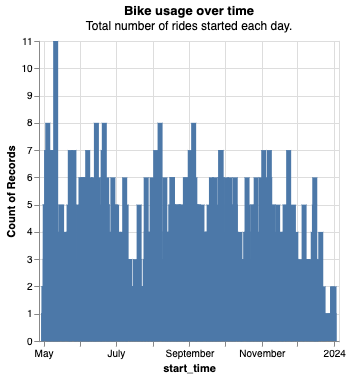

---
# Ressurser

**OBS:** Denne introduksjonen er delvis basert på [Visualization Curriculum](https://github.com/uwdata/visualization-curriculum) fra University of Washington og Cagatay Turkays [CEDAS-NORBIS Summer School lectures on Visual Data Science](https://github.com/cagatayTurkay/2023_CEDAS_NORBIS-PhDSummerSchool-VisualDataScience/tree/main). 

**Datasett som brukes i denne modulen:** 
- Titanic Dataset with Coordinates: [https://www.kaggle.com/datasets/amykzhang/titanic-dataset-with-coordinates](https://www.kaggle.com/datasets/amykzhang/titanic-dataset-with-coordinates)
- Bergen Weather Data 2023: [https://www.kaggle.com/datasets/amykzhang/bergen-weather-data-2023](https://www.kaggle.com/datasets/amykzhang/bergen-weather-data-2023)

---
By Laura Garrison and Ke Er Zhang. © Copyright 2024.